
# Data Visualization & Statistical Analysis Lab — Retail Sales
**Name:** Sudhanshu Sekhar Dash  
**Course:** MSCS-634 — Advanced Big Data and Data Mining (Second Bi-term)  
**Lab Title:** Data Visualization, Preprocessing, and Statistical Analysis with Pandas & Matplotlib  

**Dataset Source:** [Retail Sales Dataset — Kaggle (by Mohammad Talib)](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset)

> This notebook follows the lab instructions: Data Collection → Visualization → Preprocessing → Statistical Analysis.  
> **Screenshot markers** are included as `📸 Screenshot Required` comments under the relevant outputs.


In [5]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Helper for clean section printing
def section(title):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))



## Step 1: Data Collection

- Load the Kaggle *Retail Sales Dataset* into a Pandas DataFrame.  
- Ensure the CSV file `retail_sales_dataset.csv` is in the same directory as this notebook.  
- **📸 Screenshot Required:** Display the first five rows using `.head()` or `.sample()`.


In [7]:

# Load dataset
df = pd.read_csv(r'G:\UCumberlands\Data Mining\retail_sales_dataset.csv')

# Parse date if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

section("First Five Rows")
display(df.head())  # 📸 Screenshot Required



First Five Rows


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



## Step 2: Data Visualization

Create a series of exploratory plots using **matplotlib** (no seaborn).  
**One chart per figure** and **do not set explicit colors**.

- Scatter Plot: Quantity vs Total Amount  
- Line Plot: Monthly Total Amount trend  
- Bar Chart: Average Total Amount by Product Category  
- Histogram: Total Amount distribution  
- Box Plot: Total Amount spread & outliers  
- Pie Chart: Revenue share by Product Category (or Gender)

**📸 Screenshot Required:** Include at least two visualizations with insight text.


Available columns: ['Quantity', 'Price per Unit', 'Total Amount', 'Product Category', 'Gender', 'Date']


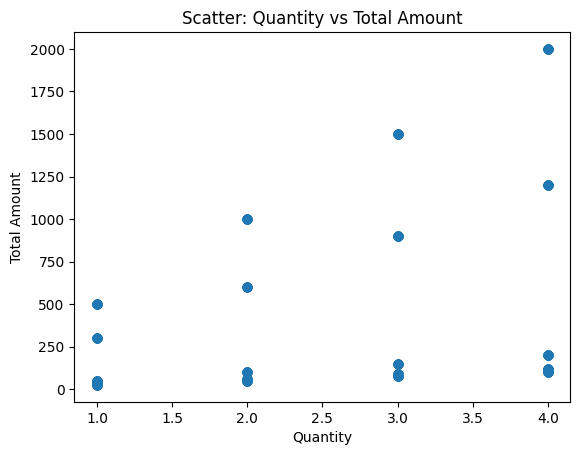

Insight: Higher quantities tend to result in higher totals, with variance due to price per unit and discounts if any.


C:\Users\pc1\AppData\Local\Temp\ipykernel_24532\4108409391.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Total Amount']


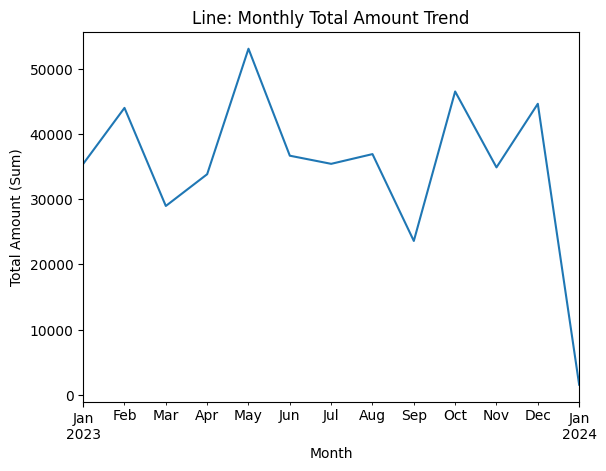

Insight: Trend reveals seasonality or growth/decline over months.


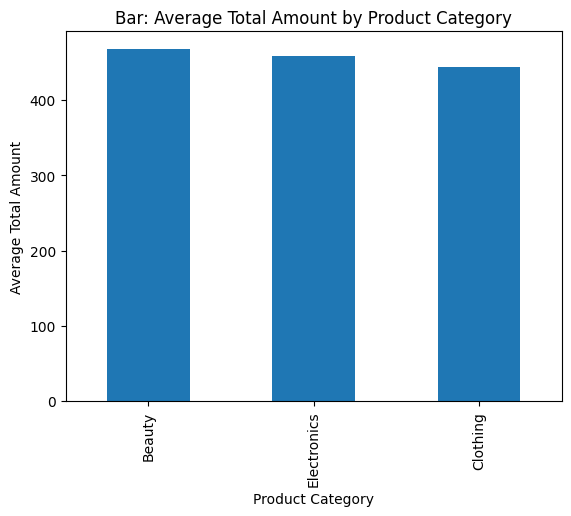

Insight: Categories with higher prices/quantities show higher average totals.


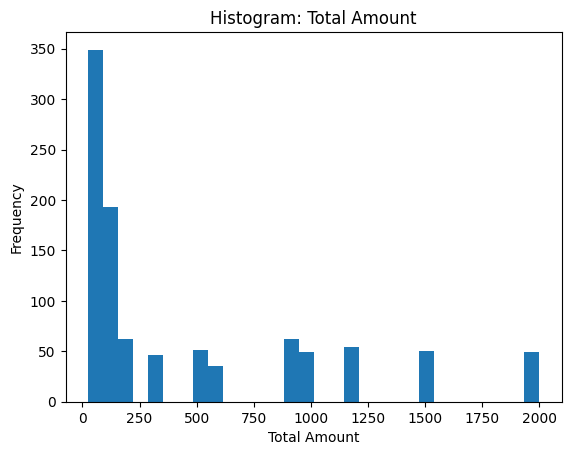

Insight: Right-skew is typical—many small/medium purchases and fewer large ones.


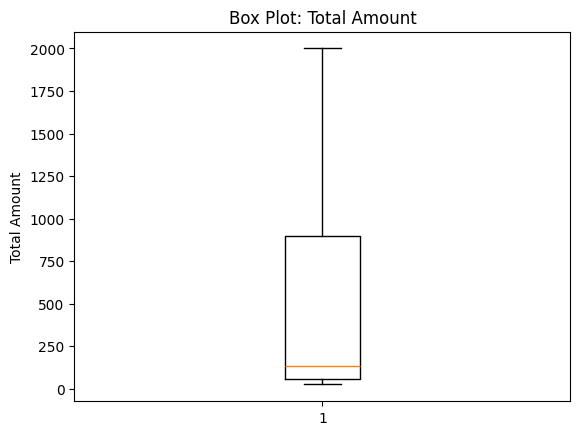

Insight: Outliers likely correspond to high-value purchases.


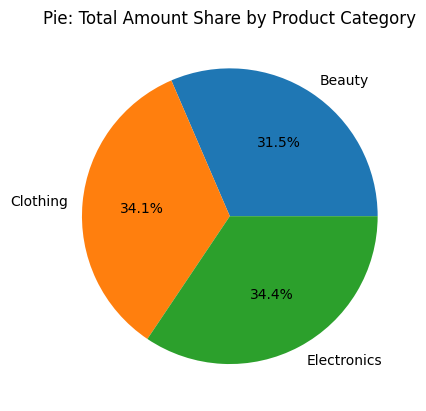

Insight: Shows contribution of each Product Category to overall revenue.


In [8]:

# Ensure needed columns exist based on common Kaggle schema
expected_cols = ['Quantity', 'Price per Unit', 'Total Amount', 'Product Category', 'Gender', 'Date']
available = [c for c in expected_cols if c in df.columns]
print("Available columns:", available)

# Fallback calculations if 'Total Amount' missing
if 'Total Amount' not in df.columns and {'Quantity','Price per Unit'}.issubset(df.columns):
    df['Total Amount'] = df['Quantity'] * df['Price per Unit']

# ---- Scatter: Quantity vs Total Amount ----
if {'Quantity', 'Total Amount'}.issubset(df.columns):
    plt.figure()
    plt.scatter(df['Quantity'], df['Total Amount'])
    plt.title('Scatter: Quantity vs Total Amount')
    plt.xlabel('Quantity')
    plt.ylabel('Total Amount')
    plt.show()
    print("Insight: Higher quantities tend to result in higher totals, with variance due to price per unit and discounts if any.")  # 📸
else:
    print("Scatter skipped: required columns not found.")

# ---- Line: Monthly Total Amount Trend ----
if 'Date' in df.columns and df['Date'].notna().any():
    monthly = (df
               .dropna(subset=['Date'])
               .set_index('Date')
               .resample('M')['Total Amount']
               .sum())
    if not monthly.empty:
        plt.figure()
        monthly.plot()
        plt.title('Line: Monthly Total Amount Trend')
        plt.xlabel('Month')
        plt.ylabel('Total Amount (Sum)')
        plt.show()
        print("Insight: Trend reveals seasonality or growth/decline over months.")  # 📸
    else:
        print("Line plot skipped: monthly aggregation is empty.")
else:
    print("Line plot skipped: 'Date' column missing or all invalid.")

# ---- Bar: Average Total by Product Category ----
if {'Product Category','Total Amount'}.issubset(df.columns):
    cat_avg = df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)
    plt.figure()
    cat_avg.plot(kind='bar')
    plt.title('Bar: Average Total Amount by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Average Total Amount')
    plt.show()
    print("Insight: Categories with higher prices/quantities show higher average totals.")  # 📸

# ---- Histogram: Total Amount Distribution ----
if 'Total Amount' in df.columns:
    plt.figure()
    df['Total Amount'].plot(kind='hist', bins=30)
    plt.title('Histogram: Total Amount')
    plt.xlabel('Total Amount')
    plt.ylabel('Frequency')
    plt.show()
    print("Insight: Right-skew is typical—many small/medium purchases and fewer large ones.")  # 📸

# ---- Box Plot: Total Amount ----
if 'Total Amount' in df.columns:
    plt.figure()
    plt.boxplot(df['Total Amount'].dropna())
    plt.title('Box Plot: Total Amount')
    plt.ylabel('Total Amount')
    plt.show()
    print("Insight: Outliers likely correspond to high-value purchases.")  # 📸

# ---- Pie: Revenue share by Product Category (fallback to Gender) ----
group_field = None
if 'Product Category' in df.columns:
    group_field = 'Product Category'
elif 'Gender' in df.columns:
    group_field = 'Gender'

if group_field and 'Total Amount' in df.columns:
    rev_share = df.groupby(group_field)['Total Amount'].sum()
    if not rev_share.empty:
        plt.figure()
        rev_share.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie: Total Amount Share by {group_field}')
        plt.ylabel('')
        plt.show()
        print(f"Insight: Shows contribution of each {group_field} to overall revenue.")  # 📸



## Step 3: Data Preprocessing

### 3.1 Handling Missing Values
- Detect and report missing values.  
- Apply techniques: constant fill, forward/backward fill, mean/median/mode replacement, or dropping.  
**📸 Screenshot Required:** Show dataset before and after handling missing values.

### 3.2 Outlier Detection and Removal
- Use **IQR** on a numeric target (e.g., *Total Amount*).  
**📸 Screenshot Required:** Show IQR calculation, identified outliers count, and dataset after handling.

### 3.3 Data Reduction
- Apply **sampling** (by fraction/number).  
- Perform **dimension elimination** by dropping less relevant columns.  
**📸 Screenshot Required:** Show before/after shapes and columns.

### 3.4 Data Scaling & Discretization
- Apply **Min-Max** or **Z-score** scaling to numeric columns.  
- **Discretize** continuous data (e.g., Age or Total Amount) into bins.  
**📸 Screenshot Required:** Show before/after for scaling/discretization.


In [9]:

# 3.1 Missing Values
section("3.1 Handling Missing Values — BEFORE")
missing_before = df.isna().sum()
display(missing_before)  # 📸

df_mv = df.copy()

# If there are no missing values, inject small controlled missingness to demonstrate
if df_mv.isna().sum().sum() == 0:
    rng = np.random.default_rng(42)
    if 'Price per Unit' in df_mv.columns:
        idx = rng.choice(df_mv.index, size=max(1, len(df_mv)//50), replace=False)  # ~2%
        df_mv.loc[idx, 'Price per Unit'] = np.nan
    if 'Quantity' in df_mv.columns:
        idx = rng.choice(df_mv.index, size=max(1, len(df_mv)//50), replace=False)
        df_mv.loc[idx, 'Quantity'] = np.nan
    if 'Gender' in df_mv.columns:
        idx = rng.choice(df_mv.index, size=max(1, len(df_mv)//50), replace=False)
        df_mv.loc[idx, 'Gender'] = np.nan

# Strategy: numeric → fill with median; categorical → fill with mode; forward-fill as backup
numeric_cols = df_mv.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df_mv.columns if c not in numeric_cols]

for col in numeric_cols:
    median_val = df_mv[col].median()
    df_mv[col] = df_mv[col].fillna(median_val)

for col in categorical_cols:
    mode_val = df_mv[col].mode(dropna=True)
    if not mode_val.empty:
        df_mv[col] = df_mv[col].fillna(mode_val.iloc[0])
    df_mv[col] = df_mv[col].ffill().bfill()

section("3.1 Handling Missing Values — AFTER")
missing_after = df_mv.isna().sum()
display(missing_after)  # 📸

# 3.2 Outlier Detection & Removal (IQR on Total Amount if available)
section("3.2 Outlier Detection & Removal (IQR)")

df_out = df_mv.copy()
target = None
for candidate in ['Total Amount', 'Price per Unit', 'Quantity']:
    if candidate in df_out.columns:
        target = candidate
        break

if target:
    Q1 = df_out[target].quantile(0.25)
    Q3 = df_out[target].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"Target column: {target}")
    print(f"Q1={Q1:.3f}, Q3={Q3:.3f}, IQR={IQR:.3f}, lower={lower:.3f}, upper={upper:.3f}")  # 📸

    outlier_mask = (df_out[target] < lower) | (df_out[target] > upper)
    print("Outliers identified:", int(outlier_mask.sum()))  # 📸
    df_no_outliers = df_out.loc[~outlier_mask].copy()

    section("Dataset AFTER Outlier Handling (first 5 rows)")
    display(df_no_outliers.head())  # 📸
else:
    print("No suitable numeric column found for IQR demo.")

# 3.3 Data Reduction: Sampling + Dimension Elimination
section("3.3 Data Reduction: Sampling & Dropping Columns")

df_reduced = df_no_outliers.copy() if target else df_mv.copy()

before_shape = df_reduced.shape
before_cols = df_reduced.columns.tolist()

# Sample 60% for demonstration (fixed seed)
df_reduced = df_reduced.sample(frac=0.6, random_state=42).reset_index(drop=True)

# Drop likely less relevant identifiers if present
cols_to_drop = [c for c in ['Transaction ID', 'Customer ID'] if c in df_reduced.columns]
df_reduced = df_reduced.drop(columns=cols_to_drop, errors='ignore')

after_shape = df_reduced.shape
after_cols = df_reduced.columns.tolist()

print("Before shape:", before_shape, "-> After shape:", after_shape)  # 📸
print("Dropped columns:", cols_to_drop)  # 📸
print("Columns now:", after_cols[:12], ("..." if len(after_cols)>12 else ""))  # 📸

section("Dataset AFTER Reduction (first 5 rows)")
display(df_reduced.head())  # 📸

# 3.4 Scaling & Discretization
section("3.4 Scaling & Discretization")

df_scaled = df_reduced.copy()

# Numeric columns for scaling (avoid scaling dates)
num_cols_scale = df_scaled.select_dtypes(include=[np.number]).columns.tolist()

# Keep a preview before scaling
print("Numeric columns to scale:", num_cols_scale)
preview_before = df_scaled[num_cols_scale].head()
print("\nPreview BEFORE scaling:")
display(preview_before)  # 📸

# Min-Max scaling (manual) to [0,1]
for col in num_cols_scale:
    col_min = df_scaled[col].min()
    col_max = df_scaled[col].max()
    if pd.notna(col_min) and pd.notna(col_max) and col_max != col_min:
        df_scaled[col+'_minmax'] = (df_scaled[col] - col_min) / (col_max - col_min)

# Z-score scaling (manual): (x - mean)/std
for col in num_cols_scale:
    std = df_scaled[col].std()
    mean = df_scaled[col].mean()
    if pd.notna(std) and std != 0:
        df_scaled[col+'_zscore'] = (df_scaled[col] - mean) / std

# Discretize Age or Total Amount into bins if available
if 'Age' in df_scaled.columns:
    df_scaled['Age_Bin'] = pd.cut(df_scaled['Age'], bins=[0,18,30,45,60,120], labels=['0-18','19-30','31-45','46-60','60+'])
elif 'Total Amount' in df_scaled.columns:
    df_scaled['TotalAmount_Bin'] = pd.qcut(df_scaled['Total Amount'], q=4, labels=['Q1','Q2','Q3','Q4'])

print("\nPreview AFTER scaling/discretization:")
display(df_scaled.head())  # 📸



3.1 Handling Missing Values — BEFORE


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


3.1 Handling Missing Values — AFTER


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


3.2 Outlier Detection & Removal (IQR)
Target column: Total Amount
Q1=60.000, Q3=900.000, IQR=840.000, lower=-1200.000, upper=2160.000
Outliers identified: 0

Dataset AFTER Outlier Handling (first 5 rows)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3.0,50.0,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2.0,500.0,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1.0,30.0,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1.0,500.0,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2.0,50.0,100



3.3 Data Reduction: Sampling & Dropping Columns
Before shape: (1000, 9) -> After shape: (600, 7)
Dropped columns: ['Transaction ID', 'Customer ID']
Columns now: ['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'] 

Dataset AFTER Reduction (first 5 rows)


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-01-01,Male,46,Beauty,3.0,50.0,1500
1,2023-04-25,Male,41,Clothing,2.0,50.0,100
2,2023-11-30,Male,48,Clothing,1.0,300.0,300
3,2023-07-16,Female,44,Clothing,4.0,25.0,100
4,2023-09-16,Female,19,Electronics,4.0,500.0,2000



3.4 Scaling & Discretization
Numeric columns to scale: ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

Preview BEFORE scaling:


,Age,Quantity,Price per Unit,Total Amount
0,46,3.0,50.0,1500
1,41,2.0,50.0,100
2,48,1.0,300.0,300
3,44,4.0,25.0,100
4,19,4.0,500.0,2000



Preview AFTER scaling/discretization:


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_minmax,Quantity_minmax,Price per Unit_minmax,Total Amount_minmax,Age_zscore,Quantity_zscore,Price per Unit_zscore,Total Amount_zscore,Age_Bin
0,2023-01-01,Male,46,Beauty,3.0,50.0,1500,0.608696,0.666667,0.052632,0.746835,0.366170,0.399252,-0.682234,1.912015,46-60
1,2023-04-25,Male,41,Clothing,2.0,50.0,100,0.500000,0.333333,0.052632,0.037975,0.003984,-0.484701,-0.682234,-0.651744,31-45
2,2023-11-30,Male,48,Clothing,1.0,300.0,300,0.652174,0.000000,0.578947,0.139241,0.511045,-1.368655,0.649127,-0.285493,46-60
3,2023-07-16,Female,44,Clothing,4.0,25.0,100,0.565217,1.000000,0.000000,0.037975,0.221296,1.283206,-0.815370,-0.651744,31-45
4,2023-09-16,Female,19,Electronics,4.0,500.0,2000,0.021739,1.000000,1.000000,1.000000,-1.589635,1.283206,1.714216,2.827643,19-30



## Step 4: Statistical Analysis

### 4.1 General Overview of Data
- Use `.info()` and `.describe()`  
**📸 Screenshot Required:** Display outputs.

### 4.2 Central Tendency Measures
- Min, Max, Mean, Median, Mode  
**📸 Screenshot Required:** Display the results table.

### 4.3 Dispersion Measures
- Range, Quartiles, IQR, Variance, Std Dev  
**📸 Screenshot Required:** Display the results table.

### 4.4 Correlation Analysis
- Compute correlation matrix for numerical columns with `.corr()`  
**📸 Screenshot Required:** Display the matrix.


In [11]:

# 4.1 Overview
import io  # ✅ for StringIO buffer

section("4.1 .info() and .describe()")

# Create a StringIO buffer to capture df.info() output
buf = io.StringIO()
df.info(buf=buf)

# Get the string contents and print them
info_text = buf.getvalue()
print(info_text)  # 📸

# Display descriptive statistics
display(df.describe(include='all').transpose())  # 📸

# Determine numeric columns for further stats
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 4.2 Central Tendency
section("4.2 Central Tendency Measures")
ct_stats = []
for col in numeric_cols:
    s = df[col].dropna()
    if s.empty:
        continue
    mode_vals = s.mode()
    ct_stats.append({
        'Column': col,
        'Min': s.min(),
        'Max': s.max(),
        'Mean': s.mean(),
        'Median': s.median(),
        'Mode': mode_vals.iloc[0] if not mode_vals.empty else np.nan
    })

ct_df = pd.DataFrame(ct_stats).set_index('Column')
display(ct_df)  # 📸

# 4.3 Dispersion
section("4.3 Dispersion Measures")
disp_stats = []
for col in numeric_cols:
    s = df[col].dropna()
    if s.empty:
        continue
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    disp_stats.append({
        'Column': col,
        'Range': s.max() - s.min(),
        'Q1': q1,
        'Median (Q2)': s.median(),
        'Q3': q3,
        'IQR': iqr,
        'Variance': s.var(),
        'Std Dev': s.std()
    })
disp_df = pd.DataFrame(disp_stats).set_index('Column')
display(disp_df)  # 📸

# 4.4 Correlation Matrix
section("4.4 Correlation Matrix")
if numeric_cols:
    corr = df[numeric_cols].corr(numeric_only=True)
    display(corr)  # 📸
else:
    print("No numeric columns available for correlation.")




4.1 .info() and .describe()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB



,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,1000.0,NaN,NaN,NaN,500.5,1.0,250.75,500.5,750.25,1000.0,288.819436
Date,1000,NaN,NaN,NaN,2023-07-03 00:25:55.200000256,2023-01-01 00:00:00,2023-04-08 00:00:00,2023-06-29 12:00:00,2023-10-04 00:00:00,2024-01-01 00:00:00,NaN
Customer ID,1000,1000,CUST1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,18.0,29.0,42.0,53.0,64.0,13.68143
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.0,1.0,3.0,4.0,4.0,1.132734
Price per Unit,1000.0,NaN,NaN,NaN,179.89,25.0,30.0,50.0,300.0,500.0,189.681356
Total Amount,1000.0,NaN,NaN,NaN,456.0,25.0,60.0,135.0,900.0,2000.0,559.997632



4.2 Central Tendency Measures


,Min,Max,Mean,Median,Mode
Column,,,,,
Transaction ID,1,1000,500.500,500.5,1
Age,18,64,41.392,42.0,43
Quantity,1,4,2.514,3.0,4
Price per Unit,25,500,179.890,50.0,50
Total Amount,25,2000,456.000,135.0,50



4.3 Dispersion Measures


,Range,Q1,Median (Q2),Q3,IQR,Variance,Std Dev
Column,,,,,,,
Transaction ID,999,250.75,500.5,750.25,499.5,83416.666667,288.819436
Age,46,29.00,42.0,53.00,24.0,187.181518,13.681430
Quantity,3,1.00,3.0,4.00,3.0,1.283087,1.132734
Price per Unit,475,30.00,50.0,300.00,270.0,35979.016917,189.681356
Total Amount,1975,60.00,135.0,900.00,840.0,313597.347347,559.997632



4.4 Correlation Matrix


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000
